In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.cm.tab20
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import defaultdict
from src.woe_iv import WoeComputer, IvComputer
from src.preprocess import Binner

### Loading the dataset

In [2]:
data = pd.read_csv("dataset/germancredit.csv")

In [3]:
cols_num_beans = {
    "age.in.years":10, 
    "duration.in.month":5,
    "credit.amount":15
    
}
cols_todo_bins = list(cols_num_beans)

In [4]:
cols_todo_bins

['age.in.years', 'duration.in.month', 'credit.amount']

In [5]:
binner = Binner(cols_todo_bins, cols_num_beans)

In [6]:
data = binner(data)

In [8]:
binner.data.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,"(3.932, 17.6]",critical account/ other credits existing (not ...,radio/television,"(231.826, 1461.6]",unknown/ no savings account,... >= 7 years,4,male : divorced/separated,none,...,real estate,"(63.8, 69.4]",none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,"(44.8, 58.4]",existing credits paid back duly till now,radio/television,"(5096.4, 6308.0]",... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,none,...,real estate,"(18.944, 24.6]",none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,"(3.932, 17.6]",critical account/ other credits existing (not ...,education,"(1461.6, 2673.2]",... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,"(47.0, 52.6]",none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,"(31.2, 44.8]",existing credits paid back duly till now,furniture/equipment,"(7519.6, 8731.2]",... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,guarantor,...,building society savings agreement/ life insur...,"(41.4, 47.0]",none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,"(17.6, 31.2]",delay in paying off in the past,car (new),"(3884.8, 5096.4]",... < 100 DM,1 <= ... < 4 years,3,male : divorced/separated,none,...,unknown / no property,"(52.6, 58.2]",none,for free,2,skilled employee / official,2,none,yes,bad


## Computing weight of evidence

In [9]:
iv_computer = IvComputer(binner.data)

In [10]:
iv_computer.iv

,feature,iv
0,status.of.existing.checking.account,0.666012
1,duration.in.month,0.231721
2,credit.history,0.293234
3,purpose,0.169195
4,credit.amount,0.320123
5,savings.account.and.bonds,0.196010
6,present.employment.since,0.086434
7,installment.rate.in.percentage.of.disposable.i...,0.026322
8,personal.status.and.sex,0.008840
9,other.debtors.or.guarantors,0.032019


In [11]:
iv_computer.weo_computer.woe['status.of.existing.checking.account']

,attribute,count,good_counts,bad_counts,total_distr,good_distr,bad_distr,woe,woe%,good - bad,(good - bad) * woe
0,no checking account,394,348,46,0.394,0.497143,0.153333,1.176263,117.626322,0.343810,0.404410
1,... < 0 DM,274,139,135,0.274,0.198571,0.450000,-0.818099,-81.809871,-0.251429,0.205693
2,0 <= ... < 200 DM,269,164,105,0.269,0.234286,0.350000,-0.401392,-40.139178,-0.115714,0.046447
3,... >= 200 DM / salary assignments for at leas...,63,49,14,0.063,0.070000,0.046667,0.405465,40.546511,0.023333,0.009461


<AxesSubplot:ylabel='feature'>

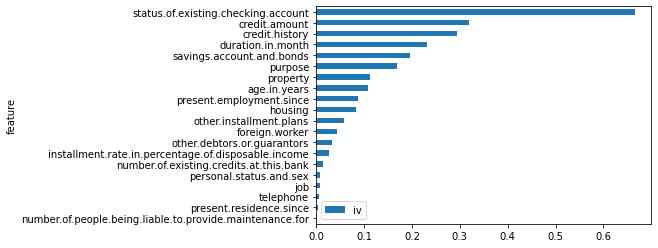

In [12]:
iv_computer.iv.sort_values("iv").plot.barh(rot=0, x = "feature", y = "iv")